# Problem_1

In [6]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sun Feb  9 16:42:01 2020

@author: zheng
"""
import h5py
import numpy as np
import matplotlib.pyplot as plt

def ReLU(x):
    return np.maximum(x, 0)

def Softmax(x):
    return np.exp(x)/np.sum(np.exp(x), axis=1)[:,None]

model = h5py.File('D:\\EE599\\HW2\\mnist_network_params.hdf5','r')
W1 = model['W1'][:]
W2 = model['W2'][:]
W3 = model['W3'][:]
b1 = model['b1'][:]
b2 = model['b2'][:]
b3 = model['b3'][:]
data = h5py.File('D:\\EE599\\HW2\\mnist_testdata.hdf5','r')
xdata = data['xdata'][:]
ydata = data['ydata'][:]

hidden1 = ReLU(xdata@W1.T + b1)
hidden2 = ReLU(hidden1@W2.T + b2)
output = Softmax(hidden2@W3.T + b3)
pred = np.argmax(output, axis=1)
fact = np.argmax(ydata, axis=1)
correct = sum(pred == fact)

print('correctly classified:', correct)

correctly classified: 9790


real label is: 5
predict label is: 6


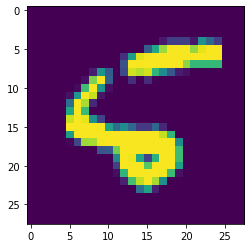

In [7]:
wrong_img = np.squeeze(xdata[np.where(pred != fact), :])
real_label = fact[np.where(pred != fact)]
pred_label = pred[np.where(pred != fact)]

plt.imshow(wrong_img[0].reshape(28,28))
print('real label is:', real_label[0])
print('predict label is:', pred_label[0])
plt.show()

real label is: 4
predict label is: 9


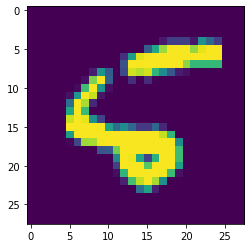

In [8]:
plt.imshow(wrong_img[0].reshape(28,28))
print('real label is:', real_label[1])
print('predict label is:', pred_label[1])
plt.show()

(f) The first image shown above is 5, I cannot recognize it. But I do think the second one is 4